In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [42]:
%matplotlib inline

In [43]:
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                         for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters


In [44]:
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    
    return newmu

In [45]:
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

In [46]:
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    
    #plt.plot(mu, clusters,'o')
    #plt.show()
    return(mu, clusters)

In [47]:
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

In [48]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        
        X.extend(x)
    
    X = np.array(X)[:N]
    return X

In [56]:
#X=init_board_gauss(200,3)
#n=7
#Y=find_centers(X,n)

X = init_board_gauss(1000, 4)
# number of centers n
n = 4
Y = find_centers(X, n)
# get the x and y for the centers and put them into a pandas dataframe
xcenter, ycenter = zip(*Y[0])
center = np.column_stack((xcenter, ycenter))
df_center = pd.DataFrame(data=center, columns=('x', 'y'))
# do the same for the clusters (dictionary with dataframes)
df_cluster = dict()
for i in range(0, (len(Y[1]))):
    print(i)
    xtemp, ytemp = zip(*Y[1][i])
    cluster = np.column_stack((xtemp, ytemp))
    df_cluster[i] = pd.DataFrame(data=cluster, columns=('x', 'y'))

# and now plot it
for i in range(0, (len(df_cluster))):
    plt.scatter(df_cluster[i].x, df_cluster[i].y)
    plt.scatter(df_center.x, df_center.y, marker='X')
plt.show()

TypeError: Population must be a sequence or set.  For dicts, use list(d).

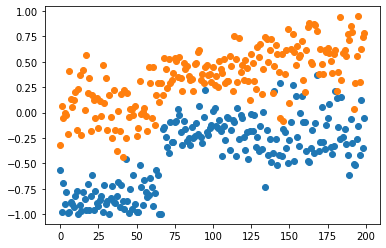

In [21]:
plt.plot(X,'o')
plt.show()